#Taller Pandas - Numpy

### **Instrucciones:**

1. Formula 1 pregunta de análisis sobre tu conjunto de datos
2. Utilizando Pandas y Numpy:
  - Limpieza de datos (Pandas: dropna, fillna, replace, etc.)
  - Filtrado y selección de datos
  - Transformación de columnas, creación de variables nuevas
  - Agrupaciones y resúmenes (groupby)
  - Conversión a array NumPy para operaciones matemáticas rápidas (media, desvío, normalización, operaciones vectorizadas)
3. Responde la pregunta planteada con una breve interpretación.

### **Ejemplos de preguntas para el reto:**
- ¿Cuál es el promedio de ventas por mes?
- ¿Cómo cambian la cantidad de productos exportados a lo largo del tiempo?
- ¿Hay valores atípicos en alguna columna numérica? ¿Cómo los tratarías?
- ¿Cuál es la categoría más frecuente y qué la distingue en el dataset?
- ¿Qué porcentaje de transacciones tiene una cantidad vendida superior al promedio?
- ¿Qué días tuvieron ventas totales fuera de lo común (muy altas o muy bajas)?

In [9]:
#Importar librerias a utilizar (pandas, numpy)
import pandas as pd
import numpy as np

In [10]:
#Otorgar permisos de acceso a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Leer el archivo con el cual voy a trabajar - debo subirlo a mi drive para leerlo desde ahì
datos_pizzeria = pd.read_excel('/content/drive/MyDrive/Enhanced_pizza_sell_data_2024-25.xlsx')
datos_pizzeria.head(10)


,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458
5,ORD006,Domino's,"New York, NY",2024-01-06 19:00:00,2024-01-06 19:20:00,20,Medium,Non-Veg,3,3.0,...,1.000000,January,Online,7.2,12.8,False,6,3,19,30.259434
6,ORD007,Papa John's,"Los Angeles, CA",2024-01-07 20:15:00,2024-01-07 20:40:00,25,Large,Veg,4,4.5,...,0.888889,January,Online,10.8,14.2,False,12,2,20,28.186275
7,ORD008,Little Caesars,"Chicago, IL",2024-01-08 18:30:00,2024-01-08 18:50:00,20,Small,Vegan,2,2.0,...,1.000000,January,Offline,4.8,15.2,False,2,1,18,28.844221
8,ORD009,Pizza Hut,"Miami, FL",2024-01-09 19:45:00,2024-01-09 20:10:00,25,XL,Cheese Burst,5,5.0,...,1.000000,January,Online,12.0,13.0,False,20,3,19,29.948454
9,ORD010,Marco's Pizza,"Dallas, TX",2024-01-10 13:00:00,2024-01-10 13:20:00,20,Medium,Non-Veg,3,3.5,...,0.857143,January,Online,8.4,11.6,False,6,2,13,30.286458


In [12]:
print(datos_pizzeria.shape)

(1004, 25)


## Pregunta de Análisis

## Realice un analisis del comportamiento de las ventas durante el dìa

In [27]:
# Filtrado por columna requerida
order_hour = datos_pizzeria["Order Hour"]
order_hour.head(10)

,Order Hour
0,18
1,20
2,12
3,19
4,13
5,19
6,20
7,18
8,19
9,13


In [37]:
# Encontrar la hora top de ventas
hora_top_ventas = datos_pizzeria["Order Hour"].value_counts().idxmax()
print
print(f"La hora top de ventas es: {hora_top_ventas}")

La hora top de ventas es: 19


In [46]:
# Recuento por hora
conteo_por_horas = order_hour.value_counts()
print(conteo_por_horas)

Order Hour
19    328
18    312
20    306
13     43
14      6
17      4
21      3
12      2
Name: count, dtype: int64


In [45]:
# Porcentaje de participacion en ventas de cada hora
porcentaje_por_hora = order_hour.value_counts(normalize=True) * 100
print(porcentaje_por_hora .apply(lambda x: f"{x:.0f}%"))

Order Hour
19    33%
18    31%
20    30%
13     4%
14     1%
17     0%
21     0%
12     0%
Name: proportion, dtype: object


In [26]:
# Transformacion de serie a arreglo de numeros Numpy
order_hour = np.array(order_hour)
print(order_hour)

[18 20 12 ... 18 19 20]


In [15]:
q1 = np.percentile(order_hour, 25)
q2 = np.percentile(order_hour, 50)
q3 = np.percentile(order_hour, 75)
iqr = q3 - q1

print(f"El primer cuartil (percentil 25) es igual a: {q1}")
print(f"El segundo cuartil (percentil 50) es igual a: {q2}")
print(f"El tercer cuartil (percentil 75) es igual a: {q3}")
print(f"El rango intercuartil es igual a: {iqr}")

El primer cuartil (percentil 25) es igual a: 18.0
El segundo cuartil (percentil 50) es igual a: 19.0
El tercer cuartil (percentil 75) es igual a: 20.0
El rango intercuartil es igual a: 2.0


In [16]:
limite_inferior = max(q1 - 1.5 * iqr, order_hour[order_hour > (q1 - 1.5 * iqr)].min())
limite_superior = min(q3 + 1.5 * iqr, order_hour[order_hour < (q3 + 1.5 * iqr)].max())
print(f"Inicio de hora pico es: {limite_inferior}")
print(f"Fin de hora pico es: {limite_superior}")


Inicio de hora pico es: 17
Fin de hora pico es: 21


In [17]:
primeras_ordenes = order_hour[order_hour < limite_inferior]
print(f"primeras ordenes:{len(primeras_ordenes)}")
ordenes_hora_pico = order_hour[(order_hour >= limite_inferior) & (order_hour <= limite_superior)]
print(f"ordenes en hora pico:{len(ordenes_hora_pico)}")
ultimas_ordenes = order_hour[order_hour > limite_superior]
print(f"ultimas ordenes:{len(ultimas_ordenes)}")

primeras ordenes:51
ordenes en hora pico:953
ultimas ordenes:0


<Axes: xlabel='Order Hour', ylabel='Density'>

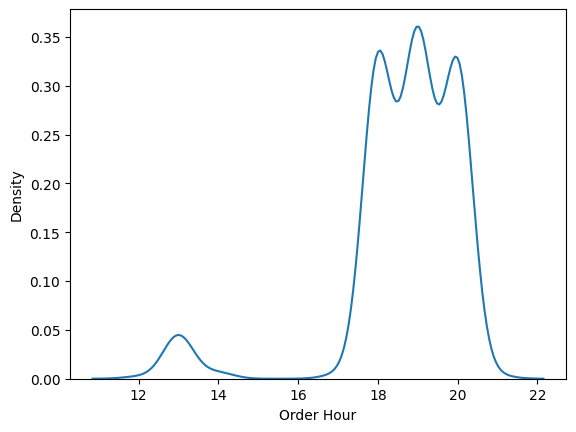

In [25]:
# Grafica de cuartiles y percentiles
import seaborn as sns
sns.kdeplot(datos_pizzeria["Order Hour"])

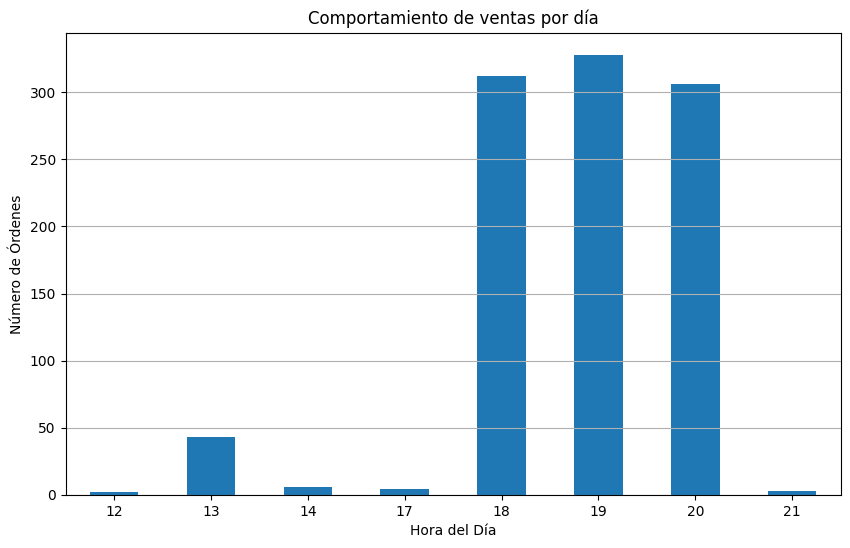

In [49]:
import matplotlib.pyplot as plt

# Grafica del recuento por horas
plt.figure(figsize=(10, 6))
conteo_por_horas.sort_index().plot(kind='bar')
plt.title('Comportamiento de ventas por día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Órdenes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

##Conclusion

### Dentro del analisis realizado se puede evidenciar que el rango de horas con mayor demanda esta entre las 6 pm y 8 pm teniendo como hora top de ventas las 7 pm tal y como se puede evidenciar en la grafica anterior.